## 00. EDA 전 feature들 알아보자!!!
##### row data의 feature의 설명(description, dictionary)를 통해 데이터의 각 columns와 rows의 의미를 이해하는 기술
> 1. Survival : 0=No, 1=Yes <br>
> 2. Pclass : 1=1st, 2=2nd, 3=3rd<br>
> 3. Sex : 성별<br>
> 4. Age : 나이<br>
> 5. SibSp : 타이타닉호에 탑승한 형제/남매들<br>
> 6. Parch : 타이타닉호에 탑승한 부모/자녀들<br>
> 7. Ticket : 티켓 번호<br>
> 8. Fare : 요금<br>
> 9. Cabin : 객실 번호<br>
> 10. Embarked : 승선위치 C = Cherbourg, Q = Queenstown, S = Southampton <br>


## 01. EDA&전처리 PART

In [96]:
#라이브러리 불러오기
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#파일 읽기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [97]:
#행열 갯수 관찰
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [98]:
#데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
#데이터 확인
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> **1) 데이터 확인을 통한 데이터 분석** <br>
> 1. PassengerID는 그냥 순서대로 나열한 것이므로 생존자 예측과 관련없음.(제거할 항목)<br>
> 2. Name도 관련 없어보임.이름이 더 길거나 짧다고 해서 더 오래 사는 것 아님.(제거할 항목)<br>
> 3. Age에서 0.5는 무엇인가...? 나이를 반년 더 살았다는 것일까?? 이거에 대한 전처리 고민 필요.<br>
> 4. Ticket번호에 지위가 나타난 것이 아니므로 생존과 관련없어보임.(제거할 항목)<br>
> 5. 요금의 범위를 나눠야할듯. 인코딩 필요함. 요금에 따라 좋은 자리임.<br>
> 6. Cabin 객실번호는 관련이 없진 않을 듯...? 좀 더 알아보기.NAN값 처리방법 고민하기<br>


In [100]:
#위 분석을 통한 열 삭제
train=train.drop(columns=['PassengerId'])
train=train.drop(columns=['Name'])
train=train.drop(columns=['Ticket'])

In [101]:
#열 삭제 확인
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [102]:
#위 분석을 통한 열 삭제(2)
test=test.drop(columns=['PassengerId'])
test=test.drop(columns=['Name'])
test=test.drop(columns=['Ticket'])

In [103]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [104]:
#결측치 확인
train.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [105]:
#결측치 확인
test.isnull()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
413,False,False,True,False,False,False,True,False
414,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,True,False
416,False,False,True,False,False,False,True,False


In [106]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [107]:
test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

> **2) 결측치 확인 후 데이터 분석** <br>
> 1. train : Age, Cabin, Embarked에 결측치가 있음을 알수있음. <br>
> 2. test : Age, Fare, Cabin에 결측치가 있음을 알수있음. <br>
> 3. Cabin의 결측치는 너무 많으므로 제거하는 편이 성능에 더 나을듯.(제거할 항목)<br>
> 4. Age는 결측치를 어떻게 처리할지 고민하자.<br>

In [108]:
#위 분석을 통한 열 삭제
train=train.drop(columns=['Cabin'])
test=test.drop(columns=['Cabin'])

In [109]:
#삭제 확인
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [112]:
# 수치데이터 특성 보기 : 결측치를 제외하고 수치형 데이터에 대해 요약.
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


> **3) 사분위수 범위(IQR)**<br>
> #사분위수 범위는 자료집합의 중간 50%에 포함되는 자료의 산포도. 주어진 자료는 오름차순 정렬됨. <br>
    > #중앙값? 자료수가 홀수면 중앙위치한 자료값, 자료수가 짝수면 중아에 위치한 2개값의 평균값.<br>
> * 1분위수(25%): 중앙값 기준 왼쪽값들의 중앙값 의미.<br>
> * 2분위수(50%): 중앙값.<br>
> * 3분위수(75%): 중앙값 기준 오른쪽값들의 중앙값 의미.<br>
> * 사분위수 범위(IQR) = 3분위수-1분위수<br>
> ***=> 이러한 IQR 바탕으로 이를 벗어나는 범위는 이상치(outlier)로 판단하고 제거하면됨.**
> ***=> 위의 describe를 통해 대략적인 이상치 탐지를 할 수 있음.**
> ***이상치 제거 전저리 꼭 하기!!!**

<AxesSubplot:>

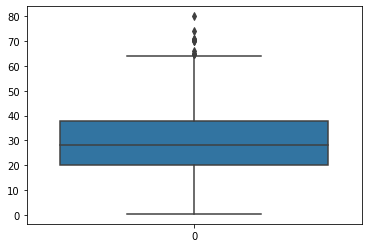

In [16]:
# 이상치 탐지

## Age 이상치 탐지
sns.boxplot(data=train['Age'])

<AxesSubplot:>

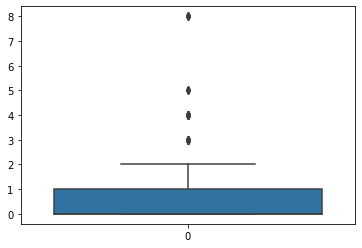

In [17]:
# 이상치 탐지

## SibSp 이상치 탐지
sns.boxplot(data=train['SibSp'])

<AxesSubplot:>

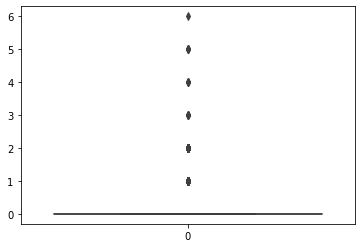

In [18]:
# 이상치 탐지

## Parch 이상치 탐지
sns.boxplot(data=train['Parch'])

<AxesSubplot:>

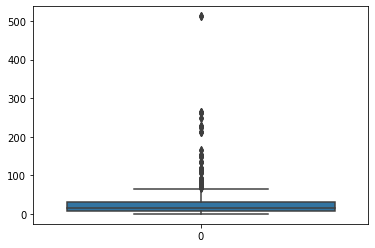

In [19]:
# 이상치 탐지

## Fare 탐지
sns.boxplot(data=train['Fare'])

<AxesSubplot:>

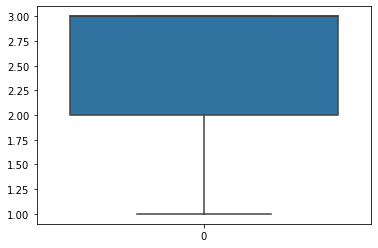

In [20]:
# 이상치 탐지

## Pclass 이상치 탐지
sns.boxplot(data=train['Pclass'])

In [21]:
#SibSp
quantile_25 = np.quantile(train['SibSp'], 0.25)
quantile_75 = np.quantile(train['SibSp'],0.75)
IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
train_IQR = train[(minimum <= train['SibSp']) & (train['SibSp'] <= maximum)]

In [22]:
train_IQR.shape

(845, 8)

In [23]:
train.shape[0]-train_IQR.shape[0]

46

In [24]:
#Parch
quantile_25 = np.quantile(train_IQR['Parch'], 0.25)
quantile_75 = np.quantile(train_IQR['Parch'],0.75)
IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
train_IQR2 = train_IQR[(minimum <= train_IQR['Parch']) & (train_IQR['Parch'] <= maximum)]

In [25]:
train_IQR2.shape

(676, 8)

In [26]:
train.shape[0]-train_IQR2.shape[0]

215

In [27]:
#Fare
quantile_25 = np.quantile(train_IQR2['Fare'], 0.25)
quantile_75 = np.quantile(train_IQR2['Fare'],0.75)
IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
train_IQR3 = train_IQR2[(minimum <= train_IQR2['Fare']) & (train_IQR2['Fare'] <= maximum)]

In [28]:
train_IQR3.shape

(591, 8)

In [29]:
train.shape[0]-train_IQR3.shape[0]

300

> IQR 분석 및 제거로 이상치 제거를 했음.<br>
> 제거한 train2 이상치 제거가 제대로 되었는지 확인.


<AxesSubplot:>

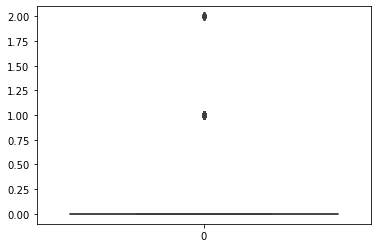

In [30]:
# 이상치 탐지

## SibSp 이상치 탐지
sns.boxplot(data=train_IQR3['SibSp'])

<AxesSubplot:>

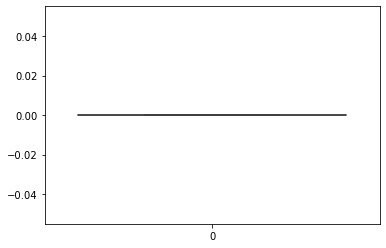

In [31]:
# 이상치 탐지

## Parch 이상치 탐지
sns.boxplot(data=train_IQR3['Parch'])

<AxesSubplot:>

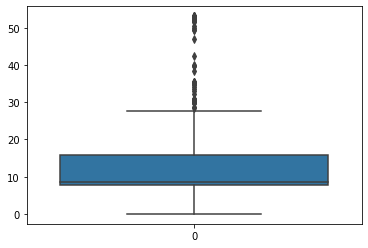

In [32]:
# 이상치 탐지

## Fare 탐지
sns.boxplot(data=train_IQR3['Fare'])

> 이상치 제거 후의 boxplot을 그려보니 이상치의 비율이 많이 줄어든 것을 시각적으로 확인할 수 있다.<br>
> 이상치 제거 후 SibSp 변수와 Parch변수의 분포는 거의 없다.(제거할 항목)<br> 

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [34]:
train_IQR3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  591 non-null    int64  
 1   Pclass    591 non-null    int64  
 2   Sex       591 non-null    object 
 3   Age       445 non-null    float64
 4   SibSp     591 non-null    int64  
 5   Parch     591 non-null    int64  
 6   Fare      591 non-null    float64
 7   Embarked  591 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.7+ KB


> 또한, train과 train_1의 info확인을 통해 수치적으로 이상치가 줄어듬을 확인할 수 있다.

In [35]:
#위 분석을 통한 열 삭제
train_1=train_IQR3.drop(columns=['Parch'])
test_1=test.drop(columns=['Parch'])

In [36]:
train_1=train_IQR3.drop(columns=['SibSp'])
test_1=test.drop(columns=['SibSp'])

In [37]:
train_1.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S
5,0,3,male,NaN,0,8.4583,Q


In [38]:
test_1.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,0,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S


C:\Users\user\anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

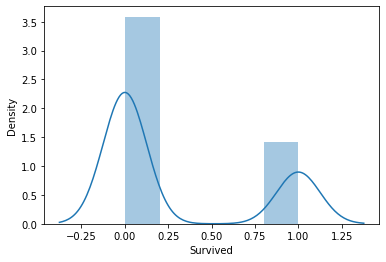

In [39]:
#타깃 변수 분포 시각화 : 예측하고자하는 변수인 종속 변수를 시각화해본다.
sns.distplot(train_1['Survived'],kde=True,bins=None)

> **생존자 분포 시각화 비율**<br>
> 생존(1) : 사망(0) = 1 : 2

In [40]:
# pairplot : 데이터에 들어있는 각 열의 모든 상관관계 출력.
# 같은 변수끼리 짝을 이루는 대각선 방향으로 히스토그램을 그리며, 서로 다른 변수 간에 산점도를 그림.

# 상관관계를 파악하고픈 열들만 뽑음.
pair_data = train_1[['Age','Pclass','Fare','Sex']]
pair_data

,Age,Pclass,Fare,Sex
0,22.0,3,7.2500,male
2,26.0,3,7.9250,female
3,35.0,1,53.1000,female
4,35.0,3,8.0500,male
5,NaN,3,8.4583,male
...,...,...,...,...
884,25.0,3,7.0500,male
886,27.0,2,13.0000,male
887,19.0,1,30.0000,female
889,26.0,1,30.0000,male


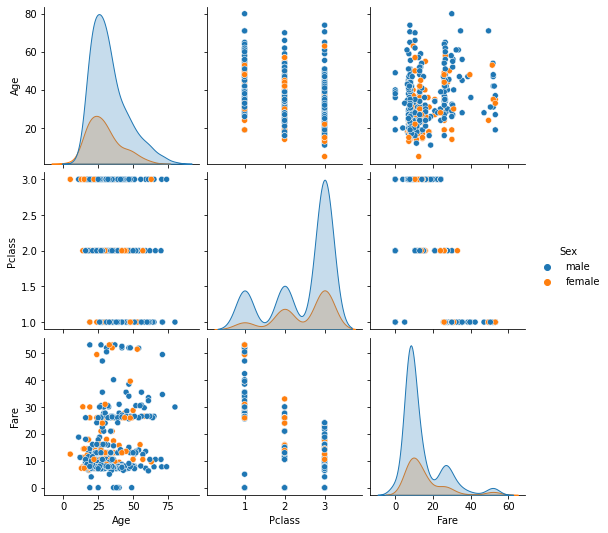

In [41]:
# pairplot : 데이터에 들어있는 각 열의 모든 상관관계 출력.
# 같은 변수끼리 짝을 이루는 대각선 방향으로 히스토그램을 그리며, 서로 다른 변수 간에 산점도를 그림.

sns.pairplot(pair_data, hue='Sex')

<AxesSubplot:title={'center':'Person Correlation of Features'}>

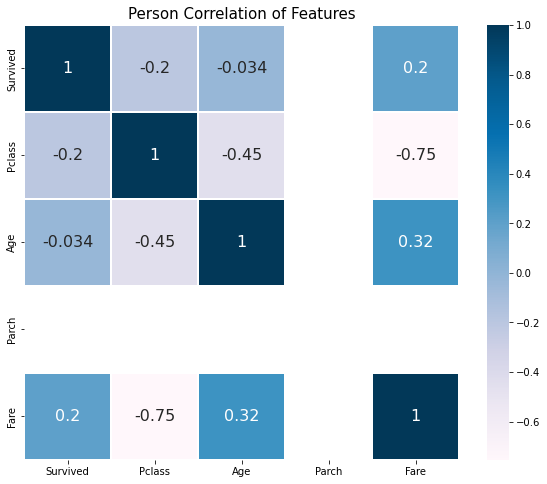

In [42]:
# heatmap : 변수별 상관관계 확인
colormap = plt.cm.PuBu
data = train_1.corr()
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y=1.0, size = 15)
sns.heatmap(data, linewidths=0.1, vmax=1.0, square =True, cmap= colormap, linecolor="white", annot=True, annot_kws={"size":16})

> **heatmap** <br>
> (1) .corr() : 사용할 데이터의 상관계수를 가져옴.<br>
> (2) linewidths : 셀을 나눈 선의 두께<br>
> (3) linecolor : 셀을 나눠주는 선의 색을 지정<br>
> (4) vmax : heatmap의 오른쪽에 위치한 컬러바의 최댓값 지정 <br>
> (5) square : 셀을 정사각형으로 출력 <br>
> (6) annot : 셀 안에 숫자를 출력 <br>
> (7) annot_kws : 숫자의 크기를 조정해줄 수 있는 파라미터 <br>
> * **독립변수간 다중공선성 파악에 용이**
> * 강한 양의 상관관계: 보통 0.7보다 클 경우 
> * 강한 음의 상관관계(하나가 증가할 경우 다른 하나는 감소한다) : -0.7보다 작을 경우



> **다중공선성 확인**
> * x증가에 따라 y가 증가하는 경향 = 두 변수의 상관도 높다.
 



<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

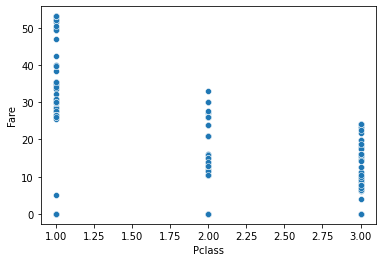

In [43]:
# 강한 음의 상관관계를 띈 Pclass/Fare의 Scatter Plot 그리기
x_data = train_1['Pclass']
y_data = train_1['Fare']
sns.scatterplot(x=x_data,y=y_data)

> x가 증가함에 따라 y가 감소함으로 두 변수의 상관도가 낮다.

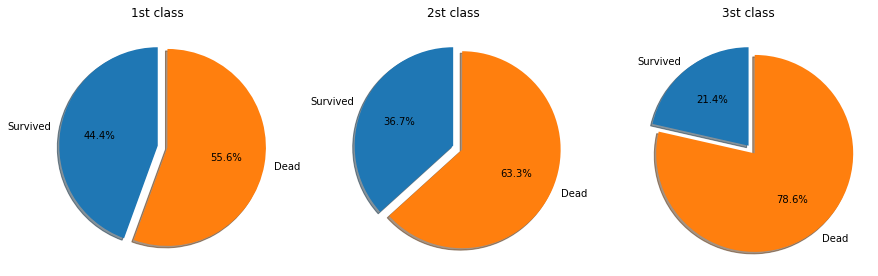

In [44]:
labels = 'Survived', 'Dead'

## Pclass에 따른 사망 분포도
size_1=[len(train_1.loc[(train_1["Pclass"]==1)&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Pclass"]==1)&(train_1["Survived"]==0)])]
size_2=[len(train_1.loc[(train_1["Pclass"]==2)&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Pclass"]==2)&(train_1["Survived"]==0)])]
size_3=[len(train_1.loc[(train_1["Pclass"]==3)&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Pclass"]==3)&(train_1["Survived"]==0)])]

explode=(0, 0.1)

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(size_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')

ax2.pie(size_2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('2st class')

ax3.pie(size_3, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.set_title('3st class')


plt.show()


> **Pclass에 따른 생존 여부 파악**
> 1. 1st class : 생존 44.4%, 사망 55.6% <br>
> 2. 2st class : 생존 36.7%, 사망 63.3% <br> 
> 3. 3st class : 생존 21.4%, 사망 78.6% <br>
> **위 결과를 보면, 1st class의 생존 비율이 가장 높은 것을 알 수 있다.**

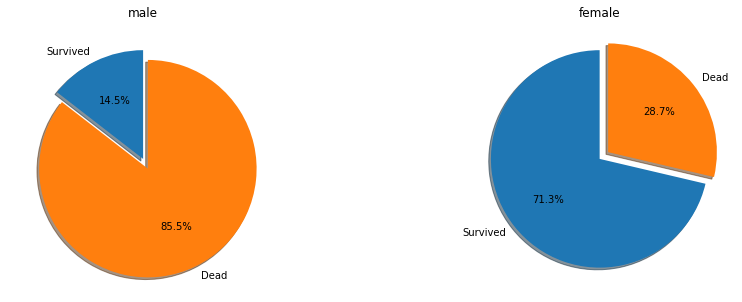

In [45]:
labels = 'Survived', 'Dead'

## Sex에 따른 사망 분포도
size_1=[len(train_1.loc[(train_1["Sex"]=='male')&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Sex"]=="male")&(train_1["Survived"]==0)])]
size_2=[len(train_1.loc[(train_1["Sex"]=='female')&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Sex"]=="female")&(train_1["Survived"]==0)])]

explode=(0, 0.1)

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(size_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')

ax2.pie(size_2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('female')


plt.show()


> **성별에 따른 생존여부 파악**<br>
> 1. male : 생존 14.5%, 사망 85.5% <br>
> 2. female : 생존 71.3%, 사망 28.7% <br>
> **위 결과를 보면, 남성보다 여성의 생존율이 높은 것을 알 수 있다.**


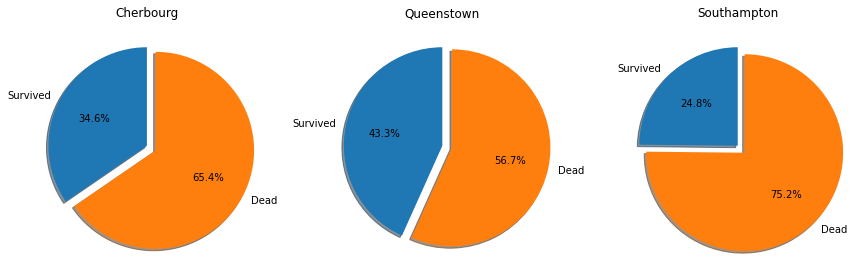

In [46]:
labels = 'Survived', 'Dead'

## Embarked에 따른 사망 분포도
size_1=[len(train_1.loc[(train_1["Embarked"]=="C")&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Embarked"]=="C")&(train_1["Survived"]==0)])]
size_2=[len(train_1.loc[(train_1["Embarked"]=="Q")&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Embarked"]=="Q")&(train_1["Survived"]==0)])]
size_3=[len(train_1.loc[(train_1["Embarked"]=="S")&(train_1["Survived"]==1)]), len(train_1.loc[(train_1["Embarked"]=="S")&(train_1["Survived"]==0)])]

explode=(0, 0.1)

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(size_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Cherbourg')

ax2.pie(size_2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Queenstown')

ax3.pie(size_3, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.set_title('Southampton')


plt.show()

> **승선 위치에 따른 생존여부**
> 1. Cherbourg : 생존 34.6%, 사망 65.4% <br>
> 2. Queenstown : 생존 43.3%, 사망 56.7% <br>
> 3. southampton : 생존 24.8%, 사망 75.2% <br>
> **Queenstown > Cherbourg > Southampton 순으로 생존율이 높다.** <br>
> **=> 이것에 대한 의미? 중요도는 사실 ,, 잘 모르겠다 ㅎㅎ**

In [47]:
train_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         146
Parch         0
Fare          0
Embarked      0
dtype: int64

In [48]:
#Age의 결측치를 평균으로 대체한다. (평균으로 대체하는 것은 최적의 값이 아닐 수도 있다.)
train_1.fillna({'Age':int(train_1['Age'].mean())},inplace=True)

In [49]:
# Age결측치 다시 확인
train_1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
train_1.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S
5,0,3,male,31.0,0,8.4583,Q


> 위 결과를 통해 결측치 제거가 아주 잘된 것을 확인할 수 있다.<br><br>
> Q. Parch는 성능 향상에 실질적인 도움이 될 것인가?<br>
> A. 가족 구성원에 따른 사망 기여도는 알 수 있으나 직접적인 영향은 주지 않음.(제거할 항목)


In [51]:
# Parch 제거
train_1=train_1.drop(columns=['Parch'])
test_1=test_1.drop(columns=['Parch'])

In [52]:
train_1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
5,0,3,male,31.0,8.4583,Q


<AxesSubplot:xlabel='Age', ylabel='Fare'>

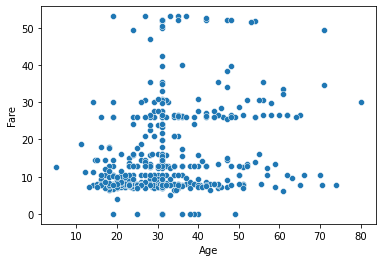

In [53]:
# Age/Fare간 산점도 그리기
x_data = train_1['Age']
y_data = train_1['Fare']
sns.scatterplot(x=x_data , y=y_data)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

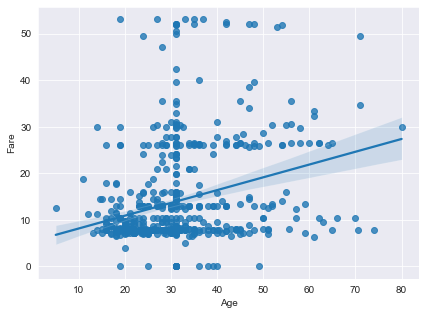

In [54]:
#선형회귀선 추가해서 시각적으로 파악하기

# grid 스타일 테마 정하기
sns.set_style('darkgrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)

# 그래프 그리기 - 선형회귀선 
sns.regplot(x='Age',
           y='Fare',
           data=train_1,
           ax=ax1,
           fit_reg=True)# fig_reg를 True로 하면 회귀선 표시


> * Fare는 티켓 요금으로 Pclass의 등석에 따라 요금이 달라진다. 
> * csv파일을 살펴보면 1등석은 Fare가 50-90달러, 2등석은 fare가 20-40달러, 3등석은 fare가 5-10달러 사이임을 알 수 있다. 
> * 이를 통해 Fare는 Pclass에 따라 달라지므로 Survived와 직접적인 상관관계가 있다.

> **위 그림을 보면 x_data 증가에 따라 y_data가 증가하므로 두 변수의 상관도 높음을 알 수 있다.**<br>
> => 다중공선성을 해결하자.<br>
> => 1. 변수 정규화<br>
> => 2. 변수 제거<br>
> => 3. PCA(주성분 분석)<br>

In [114]:
# 범주형 변수를 제거하기 위해 onehot encoding을 한다.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(train_1[['Sex']])
onehot = encoder.transform(train_1[['Sex']])

onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
onehot = pd.concat([train_1, onehot], axis=1)


C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
onehot.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,x0_female,x0_male
0,0.0,3.0,male,22.0,7.250,S,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,1.0,3.0,female,26.0,7.925,S,1.0,0.0
3,1.0,1.0,female,35.0,53.100,S,0.0,1.0
4,0.0,3.0,male,35.0,8.050,S,0.0,1.0


In [116]:
onehot.isnull().sum()

Survived     199
Pclass       199
Sex          199
Age          199
Fare         199
Embarked     199
x0_female    199
x0_male      199
dtype: int64

In [117]:
train_3 =onehot.drop(columns=['Sex'])

In [118]:
train_3.head()

,Survived,Pclass,Age,Fare,Embarked,x0_female,x0_male
0,0.0,3.0,22.0,7.250,S,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,1.0,3.0,26.0,7.925,S,1.0,0.0
3,1.0,1.0,35.0,53.100,S,0.0,1.0
4,0.0,3.0,35.0,8.050,S,0.0,1.0


In [119]:
train = train_3.dropna()

In [120]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,x0_female,x0_male
0,0.0,3.0,22.0,7.2500,S,0.0,1.0
2,1.0,3.0,26.0,7.9250,S,1.0,0.0
3,1.0,1.0,35.0,53.1000,S,0.0,1.0
4,0.0,3.0,35.0,8.0500,S,0.0,1.0
5,0.0,3.0,31.0,8.4583,Q,0.0,1.0


In [121]:
train.isnull().sum()

Survived     0
Pclass       0
Age          0
Fare         0
Embarked     0
x0_female    0
x0_male      0
dtype: int64

In [122]:
encoder2 = OneHotEncoder()
encoder2.fit(train[['Embarked']])
onehot2 = encoder2.transform(train[['Embarked']])

onehot2 = onehot2.toarray()
onehot2 = pd.DataFrame(onehot2)
onehot2.columns = encoder2.get_feature_names()
onehot2 = pd.concat([train, onehot2], axis=1)


C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [123]:
onehot2.head()

,Survived,Pclass,Age,Fare,Embarked,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0.0,3.0,22.0,7.250,S,0.0,1.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,1.0,3.0,26.0,7.925,S,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.100,S,0.0,1.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.050,S,0.0,1.0,0.0,1.0,0.0


In [124]:
onehot2 =onehot2.drop(columns=['Embarked'])

In [125]:
onehot2.head()

,Survived,Pclass,Age,Fare,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0.0,3.0,22.0,7.250,0.0,1.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,1.0,3.0,26.0,7.925,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.100,0.0,1.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.050,0.0,1.0,0.0,1.0,0.0


In [126]:
train = onehot2.dropna()

In [127]:
train.head()

,Survived,Pclass,Age,Fare,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0.0,3.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
2,1.0,3.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,0.0,1.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,0.0,1.0,0.0,1.0,0.0
5,0.0,3.0,31.0,8.4583,0.0,1.0,0.0,0.0,1.0


In [128]:
train.isnull().sum()

Survived     0
Pclass       0
Age          0
Fare         0
x0_female    0
x0_male      0
x0_C         0
x0_Q         0
x0_S         0
dtype: int64

In [129]:
#test dataset
encoder = OneHotEncoder()
encoder.fit(test_1[['Sex']])
onehot = encoder.transform(test_1[['Sex']])

onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
onehot = pd.concat([test_1, onehot], axis=1)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [130]:
test_2 =onehot.drop(columns=['Sex'])

In [131]:
test_2 = test_2.dropna()

In [132]:
encoder2 = OneHotEncoder()
encoder2.fit(test_2[['Embarked']])
onehot2 = encoder2.transform(test_2[['Embarked']])

onehot2 = onehot2.toarray()
onehot2 = pd.DataFrame(onehot2)
onehot2.columns = encoder2.get_feature_names()
onehot2 = pd.concat([test_2, onehot2], axis=1)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [133]:
onehot2 =onehot2.drop(columns=['Embarked'])

In [134]:
test = onehot2.dropna()

In [135]:
test.isnull().sum()

Pclass       0
Age          0
Fare         0
x0_female    0
x0_male      0
x0_C         0
x0_Q         0
x0_S         0
dtype: int64

In [136]:
test.head()

,Pclass,Age,Fare,x0_female,x0_male,x0_C,x0_Q,x0_S
0,3.0,34.5,7.8292,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,12.2875,1.0,0.0,0.0,0.0,1.0


> onehot encoding을 통한 수치형데이터로의 변환을 진행하였다.

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   254 non-null    float64
 1   Pclass     254 non-null    float64
 2   Age        254 non-null    float64
 3   Fare       254 non-null    float64
 4   x0_female  254 non-null    float64
 5   x0_male    254 non-null    float64
 6   x0_C       254 non-null    float64
 7   x0_Q       254 non-null    float64
 8   x0_S       254 non-null    float64
dtypes: float64(9)
memory usage: 19.8 KB


In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif['VIF Facotr']=[variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif['features']=train.columns
vif



C:\Users\user\anaconda3\envs\py37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Facotr,features
0,1.026846,Survived
1,2.701542,Pclass
2,1.227747,Age
3,2.528486,Fare
4,inf,x0_female
5,inf,x0_male
6,inf,x0_C
7,inf,x0_Q
8,inf,x0_S


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(train)
train_scale = scaler.transform(train)

new_train_df = pd.DataFrame(train_scale)
new_train_df


,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.169492,0.136535,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.237288,0.149247,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.389831,1.000000,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.389831,0.151601,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.322034,0.159290,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
249,0.0,1.0,0.322034,0.148697,0.0,1.0,0.0,0.0,1.0
250,1.0,0.5,0.406780,0.244821,0.0,1.0,1.0,0.0,0.0
251,0.0,1.0,0.322034,0.145559,0.0,1.0,0.0,0.0,1.0
252,1.0,0.5,0.084746,0.225989,0.0,1.0,0.0,0.0,1.0


In [81]:
scaler.fit(test)
test_scale = scaler.transform(test)

new_test_df = pd.DataFrame(test_scale)
new_test_df

,0,1,2,3,4,5,6,7
0,1.0,0.451566,0.017929,0.0,1.0,0.0,1.0,0.0
1,1.0,0.616757,0.014737,1.0,0.0,0.0,0.0,1.0
2,0.5,0.814986,0.025081,0.0,1.0,0.0,1.0,0.0
3,1.0,0.352451,0.021136,0.0,1.0,0.0,0.0,1.0
4,1.0,0.286375,0.035087,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
255,0.5,0.154222,0.137895,1.0,0.0,0.0,0.0,1.0
256,0.0,0.603542,0.292612,0.0,1.0,0.0,1.0,0.0
257,0.5,0.378882,0.087862,0.0,1.0,0.0,0.0,1.0
258,0.5,0.273160,0.037829,0.0,1.0,1.0,0.0,0.0


In [82]:
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif['features']=new_train_df.columns
vif

C:\Users\user\anaconda3\envs\py37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.026846,0
1,2.701542,1
2,1.227747,2
3,2.528486,3
4,inf,4
5,inf,5
6,inf,6
7,inf,7
8,inf,8


> VIF(다중 공선성 진단 수치)를 구해보니, 10이상인 값이 없다.<br>
> => 다중공선성 있는 변수가 없다는 말임.<br>


## 02. 모델링
### 신경망 설계
> * 이진 분류와 회귀 중 어떤 방식으로 접근할 지 고민하였음.
> * 생존여부를 알려주는 Survived는 1/0으로 나눠져 있으므로 이진분류가 바람직하다고 생각될 수 있음.
> * 하지만, 주택 가격 예측과 같이 회귀를 활용하여 1에 가까운 수가 나오면 생존, 0에 가까운 수가 나오면 사망으로 구분지어 탑승자의 특징 인과관계바탕의 연속적인 예측값을 구해봄.
> * 모델의 마지막 Dense층 별도의 활성화 함수를 사용하지 않음.
> * costfunction은 회귀에서 사용되는 mean square error사용.

In [138]:
train.head()

,Survived,Pclass,Age,Fare,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0.0,3.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
2,1.0,3.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,0.0,1.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,0.0,1.0,0.0,1.0,0.0
5,0.0,3.0,31.0,8.4583,0.0,1.0,0.0,0.0,1.0


In [139]:
x_data = train.drop(['Survived'],axis=1)
y_data = train['Survived']

In [140]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

np.random.seed(7)

In [144]:
input_cnt, output_cnt = 8, 1

model =Sequential()
model.add(Dense(4, input_shape=(input_cnt,),activation='relu'))
model.add(Dense((1)))


model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=['acc'])


In [145]:
history=model.fit(x_data, y_data, batch_size=1, epochs=40)


Epoch 1/40
254/254 [==============================] - 0s 298us/step - loss: 166.3158 - acc: 0.3150
Epoch 2/40
254/254 [==============================] - 0s 296us/step - loss: 14.0983 - acc: 0.3937
Epoch 3/40
254/254 [==============================] - 0s 294us/step - loss: 1.9007 - acc: 0.5945
Epoch 4/40
254/254 [==============================] - 0s 294us/step - loss: 0.8813 - acc: 0.6220
Epoch 5/40
254/254 [==============================] - 0s 291us/step - loss: 0.5277 - acc: 0.6339
Epoch 6/40
254/254 [==============================] - 0s 292us/step - loss: 0.3618 - acc: 0.6457
Epoch 7/40
254/254 [==============================] - 0s 294us/step - loss: 0.3099 - acc: 0.6417
Epoch 8/40
254/254 [==============================] - 0s 298us/step - loss: 0.2691 - acc: 0.6654
Epoch 9/40
254/254 [==============================] - 0s 298us/step - loss: 0.2492 - acc: 0.6575
Epoch 10/40
254/254 [==============================] - 0s 294us/step - loss: 0.2439 - acc: 0.6811
Epoch 11/40
254/254 [=====

#### Discussion
> 데이터 셋이 너무 작아서 NN로 하면 정확도가 너무 낮다.